# Model - two components

This example shows how to use `lmfit_global.LmfitGlobal` class to fit data with multi-components. 

This example is similar to `model_two_components.py` of [lmfit examples](https://lmfit.github.io/lmfit-py/examples/index.html) or [github link](https://github.com/lmfit/lmfit-py/tree/master/examples)


In [1]:
try:
    from lmfit_global import LmfitGlobal
except (ImportError, ModuleNotFoundError):
    import os, sys
    ROOT = os.path.abspath("..") # parent folder of examples
    sys.path.insert(0, ROOT)
    from lmfit_global import LmfitGlobal

import matplotlib.pyplot as plt
# sys.path

# Define `LmfitGlobal` class `items` data

First, load raw data...

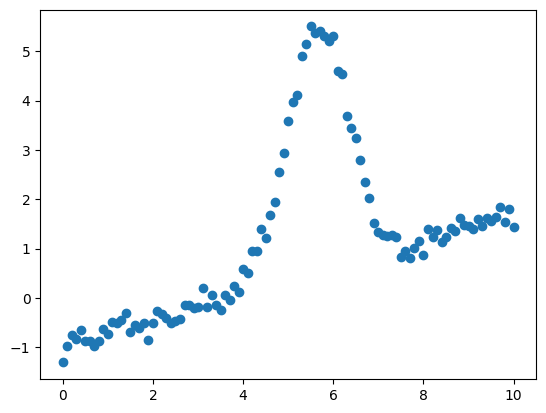

In [2]:
import os
import numpy as np
dpath = './data'  # data path

# --- Load data (skip header) ---
file = 'model1d_gauss.dat' # data
file = os.path.join(
    dpath,
    file
)

data = np.loadtxt(file)
x = data[:, 0]  # first  columm as x
y = data[:, 1]  # second column as y

# add additional extra data
y+=0.25*x - 1.0

#  --- make column data as [x, y]  ---
#  --- lets use numpy.column_stack ---
xy = np.column_stack([x, y])

# plot raw data
plt.figure()
plt.plot(x, y, 'o')
plt.show()

second, model function to fit data...

In [3]:
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))


def line(x, slope, intercept):
    """1-d  line: line(x, slope, intercept)"""
    return slope*x + intercept

finally, built `data` and `function` **`items`** `dict` for `LmfitGlobal` ...

In [4]:
# data dict
data_dict = {
    'xy': xy,         # data_xy, i.e numpy.column_stack([x, y_0, y_1, ..., y_n])
    'xrange': None    # x range in (min, max) of the data range to fit, default is None
    }

# --- NOTE ---
# (1) init_params items must match "gaussian" function arguments defined above
# (2) init_params argument you can set, 'value', 'vary':True/False, bounds, 'min'/'max' below
# (3) you can set mimimal either, 'value', or 'vary' or 'min'/'max', else defualt parameters will be used
# (4) defualt parameters are: 'value':-inf, 'vary':True, 'min':-inf & 'max':+inf
func_lst = [
    {
        'func_name': gaussian,
        'init_params' : {
            'amp': {'value':5, },
            'cen': {'value':5, },
            'wid': {'value':1, 'min':0},
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
    {
        'func_name': line,
        'init_params' : {
            'slope':     {'value':0, },
            'intercept': {'value':1, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

# function dict
function_dict = {
    'theory': func_lst,
    'theory_connectors': ['+'],
}


# """
# # --- The `theory_connectors` (list of str): 
#     A list of binary operators (e.g., '+', '-', '*', '/') that define how to combine 
#     the theory functions listed in 'theory'. Each operator connects one function to the next 
#     in left-to-right order. 
    
#     For example: 
#     - ['+', '+'] means: theory[0] + theory[1] + theory[2].

#     - ['+', '*'] means: theory[0] + theory[1] * theory[2].

#     The number of connectors must be exactly one less than the number of theory functions.
#     The ONLY (so-far) supported operators are: '+', '-', '*', '/'.

# NOTE: see above ['+'] inplace of None or []
# """


# items 
items = {
    'data': data_dict,              # 1. data (see above)
    'functions': function_dict,     # 2. theory (see above)
}

call `LmfitGlobal` class ...

In [5]:
lg = LmfitGlobal(items)
# --- The box below show how the model y(x) (CompositeModel) is define using `theory_connectors` define above ---
# --- it is upto the USER to define how to define the CompositeModel ---
# --- if you are HAPPY proceed NEXT

INFO: Parsing inputs...
INFO: Parsing input data...
INFO: Detected 1 dataset(s) with N=101 points each...
INFO: XRANGE: N=101 points each for user supplied xrange [0.0, 10.0] ...
INFO: Parsing input data COMPLETED...
INFO: Parsing function models...
INFO: 2 model component(s) detected — multi-component fit...
INFO: The model connectors used: [+]
INFO: Parsing function models COMPLETED...
INFO: The model is to be constructed as...
INFO: ##################################################################
INFO: # y(x;) = gaussian(x, amp, cen, wid) + line(x, slope, intercept) #
INFO: ##################################################################
INFO: Building lmfit backend...
INFO: Creating lmfit.Models for the models(s) function(s)...
INFO: Building lmfit CompositeModel...
INFO: CompositeModel built successfully...
INFO: Initialized parameters...


(Optional) print & plot initial parameter definitions...

Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
c0_amp_0               5     -inf      inf     None     True     None     None
c0_cen_0               5     -inf      inf     None     True     None     None
c0_wid_0               1        0      inf     None     True     None     None
c1_intercept_0         1     -inf      inf     None     True     None     None
c1_slope_0             0     -inf      inf     None     True     None     None


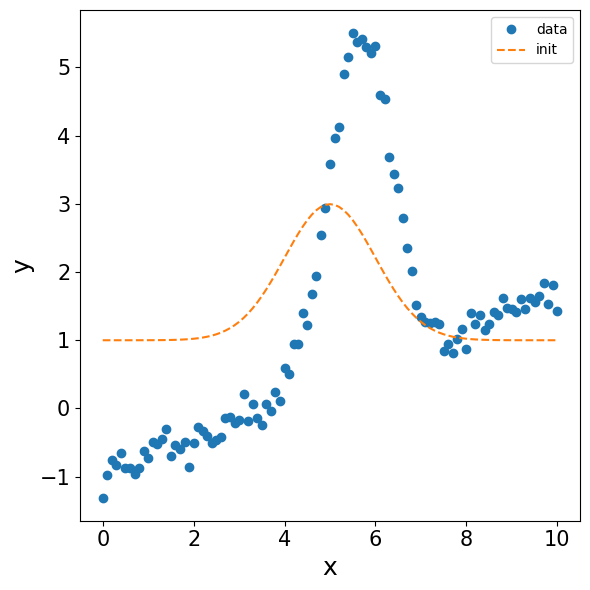

In [6]:
lg.init_params.pretty_print()  # pretty print initial parameters 
# The parameternames_{index} is generic how the cord works to indicate data index
# for multidatasets parameternames_0, parametername_1, ..., will be displayed

# --- fancy plots --- (USE IN NEXT EXAMPLES)
pretty_kw={'width': 6, 'height':6, 'dpi':100} # width and height and dpi of figure, or None to use default settings
ax0 = lg.plot_init(numpoints=None, xlabel='x', ylabel='y', pretty_kw=pretty_kw)  # plot init parameters

Now, do fit...

In [7]:
lg.fit(verbose=True)  # verbose, if True will show fit parameters

INFO: Fitting started (fit_method='leastsq') ...
INFO: Parameters fit values:
INFO: Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: c0_amp_0           8.459     -inf      inf   0.1241     True     None     None
INFO: c0_cen_0           5.655     -inf      inf 0.009177     True     None     None
INFO: c0_wid_0          0.6755        0      inf 0.009917     True     None     None
INFO: c1_intercept_0   -0.9686     -inf      inf  0.03352     True     None     None
INFO: c1_slope_0        0.2648     -inf      inf 0.005749     True     None     None
INFO: Coefficient of determination (R^2) statistics:
INFO:   R-squared = 0.99194643
INFO: Fitting finished: SUCCESS
INFO: nfev=55 | rsquared=0.99194643 | redchi=0.02685995 | aic=-360.45702 | bic=-347.38142 | time=0.01s ...


or better use: `.report()` ...

In [8]:
lg.report()

[[Model]]
    (Model(gaussian, prefix='c0_') + Model(line, prefix='c1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 101
    # variables        = 5
    chi-square         = 2.57855517
    reduced chi-square = 0.02685995
    Akaike info crit   = -360.457020
    Bayesian info crit = -347.381417
    R-squared          = 0.99194643
[[Variables]]
    c0_amp_0:        8.45930976 +/- 0.12414531 (1.47%) (init = 5)
    c0_cen_0:        5.65547889 +/- 0.00917673 (0.16%) (init = 5)
    c0_wid_0:        0.67545513 +/- 0.00991697 (1.47%) (init = 1)
    c1_slope_0:      0.26484403 +/- 0.00574892 (2.17%) (init = 0)
    c1_intercept_0: -0.96860189 +/- 0.03352202 (3.46%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1_slope_0, c1_intercept_0) = -0.7954
    C(c0_amp_0, c0_wid_0)         = +0.6664
    C(c0_amp_0, c1_intercept_0)   = -0.2216
    C(c0_amp_0, c1_slope_0)       = -0.1692
    C(c0_cen_0, c1_slope_0)      

plot fit...(Fancy LmfitGlobal matplotlib)

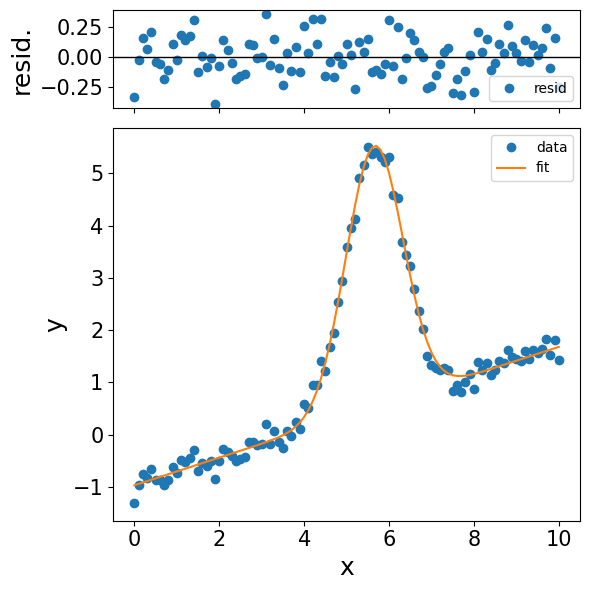

In [9]:
# --- fancy plots ---
pretty_kw={'width': 6, 'height':6, 'dpi':100} # width and height and dpi of figure, or None to use default settings
ax1 = lg.plot_fit(plot_residual=True, numpoints=None, xlabel='x', ylabel='y', pretty_kw=pretty_kw)  # plot fit parameters
# --- OR ---
# ax1 = lg.plot(plot_residual=True, show=True, numpoints=None, xlabel='x', ylabel='y', pretty_kw=pretty_kw)


WHAT ABOUT EACH COMPONENTS? i.e. `gaussian` and the `line`...

we can evaluate components using `.eval_components()`:

```python
LmfitGlobal.eval_components(
        self,
        *,
        x_data: Optional[np.ndarray] = None, 
        x_model: Optional[np.ndarray] = None, 
        params: Optional[lmfit.Parameters] = None
    )
```

will returns structured dict:
```python
{
    dataset_index: {
        component_name: {
            "data": np.ndarray,
            "model": np.ndarray,
        }
    }
}
```

in case of single dataset will return:
```python
{
    component_name: {
        "data": np.ndarray,
        "model": np.ndarray,
    }
}
```

where:
- ``dataset_index`` is the dataset number (0-based),
- ``component_name`` is the model component identifier,
- ``"data"`` contains component values on ``x_data``,
- ``"model"`` contains component values on ``x_model``.

In [10]:
xfit = np.linspace(0, 10, num=1024)
comps = lg.eval_components(x_model=xfit)

#  pythonic 
comps = None
comps_names = None
if lg.is_multicomponent:
    comps = lg.eval_components(x_model=xfit)
    comps_names = lg.component_names

# comps['c0'].keys()
# print(len(comps['c0']['data']), len(comps['c0']['model']))

plot fit...(matplotlib)

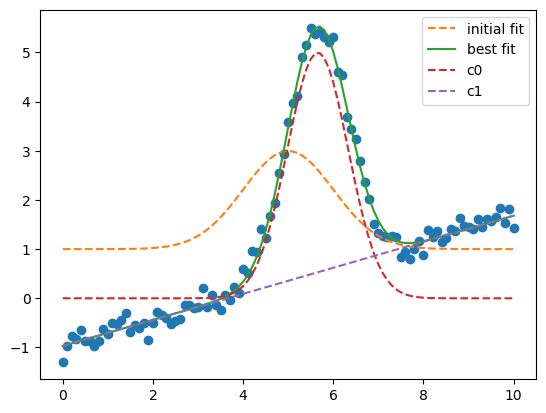

In [11]:
plt.plot(xy[:, 0], xy[:, 1], 'o')
plt.plot(xy[:, 0], lg.init_fit, '--', label='initial fit')
plt.plot(xy[:, 0], lg.best_fit, '-', label='best fit')
if lg.is_multicomponent:
    for k in comps_names:
        plt.plot(xy[:, 0], comps[k]['data'],  '--', label=k)
        # plt.plot(xfit,     comps[k]['model'], '--', label=k)
plt.legend()
# label 'c0', 'c1' refers to gaussian and line components
plt.show()

FitData object: (includes components)

In [12]:
fd = lg.get_fitdata(numpoints=1024) # int or None
fd.x_data
fd.resid_fit


#  pythonic 
comps = None
comps_names = None
if fd.is_multicomponent:
    comps = fd.components
    comps_names = fd.component_names

plotting and handling...

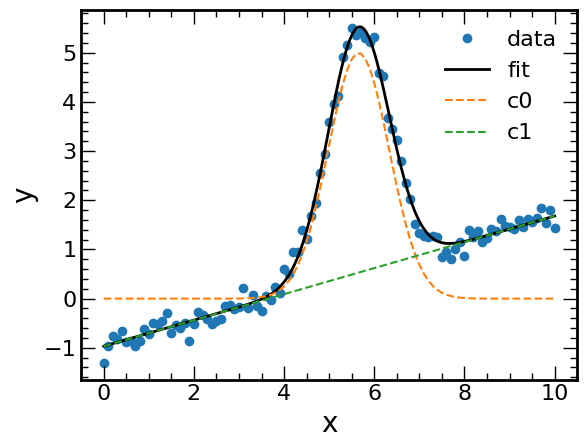

In [13]:
def _data_label(i: int, is_multidataset: bool) -> str | None:
    if is_multidataset:
        return f"data {i+1}"
    return "data" if i == 0 else None

def _fit_label(i: int, is_multidataset: bool, same_fit_color: bool) -> str | None:
    if not is_multidataset:
        return "fit" if i == 0 else None
    if same_fit_color:
        return "fit" if i == 0 else None
    return f"fit {i+1}"


fd = lg.get_fitdata(numpoints=1024) # int or None
fd.x_data
fd.resid_fit

fig, ax = plt.subplots()


for i in range(fd.ny):
    # --- data ---
    ax.plot(
        fd.x_data,
        fd.y_data[:, i],
        'o',
        zorder=1,
        label=_data_label(i, fd.is_multidataset),
    )

    # --- fit ---
    ax.plot(
        fd.x_model,
        fd.y_fit[:, i],
        '-',
        lw=2,
        color='k',
        zorder=2,
        label=_fit_label(i, fd.is_multidataset, same_fit_color=True)
        # label="fit" if i == fd.ny-1 else None, # ONE legend entry only
    )

    # --- components ---
    comps = None
    comps_names = None
    if fd.is_multicomponent:
        comps = fd.components
        comps_names = fd.component_names
        if fd.is_multidataset:
            comp = comps[i]
        else:
            comp = comps
        for name in comps_names:
            d_dict = comp[name]
            ax.plot(fd.x_data,  d_dict['data'],  '--', label=name)
            # ax.plot(fd.x_model, d_dict['model'], '--', label=name)

fontsize=16
ax.minorticks_on()
ax.set_xlabel('x', fontsize=fontsize+4)
ax.set_ylabel('y', fontsize=fontsize+4)
ax.tick_params(axis='x', labelsize=fontsize, labelcolor='k')  # Increase x-axis tick font size
ax.tick_params(axis='y', labelsize=fontsize, labelcolor='k')  # Increase y-axis tick font size
ax.tick_params(direction="in", which="both", top=True, right=True, labelsize=fontsize, labelcolor="k")
ax.tick_params(axis="both", which="major", length=10, width=1.0)
ax.tick_params(axis="both", which="minor", length=5,  width=1.0)
for spine in ax.spines.values():
    spine.set_linewidth(2)

# ax.legend()
ax.legend(
    prop={
        "size": fontsize,
        "family": "sans-serif",
        "weight": "normal",
    },
    frameon=False,
)
plt.show()

# see next examples on how we can handle multi-component and multi-dataset fit

###########################

# GlobalFitBuilder()

We can use `lmfit_global.utils.builders.GlobalFitBuilder` class to build `lmfit_global.LmfitGlobal` `items`

In [14]:
try:
    from lmfit_global import LmfitGlobal
    from lmfit_global.utils.builders import GlobalFitBuilder
except (ImportError, ModuleNotFoundError):
    import os, sys
    ROOT = os.path.abspath("..")  # parent of examples
    sys.path.insert(0, ROOT)

    from lmfit_global import LmfitGlobal
    from lmfit_global.utils.builders import GlobalFitBuilder

In [15]:
dpath = './data'  # data path

# --- Load data (skip header) ---
file = 'model1d_gauss.dat' # data
file = os.path.join(
    dpath,
    file
)

data = np.loadtxt(file)
x1 = data[:, 0]  # first  columm as x
y1 = data[:, 1]  # second column as y

# add additional extra data
y1+=0.25*x1 - 1.0

#  --- make column data as [x, y]  ---
#  --- lets use numpy.column_stack ---

xy1 = np.column_stack([x1, y1])

y_list = y1              # single dataset format 1: ALLOWED
# y_list = [y1]            # single dataset format 2: ALLOWED 
# # y_list = y1.tolist()     # single dataset format 3: NOW ALLOWED: must be array
# y_list = [y1, y1]        # multi-dataset format 1:  ALLOWED
# y_list = np.column_stack([y1, y1])  # # multi-dataset format 1:  ALLOWED, shape (N, ny): (or any other y1) ALLOWED
# UNCOMMENT ABOVE FOR YOUR CHOICE

init_gaussian = {
    'amp': {'value':5, },
    'cen': {'value':5, },
    'wid': {'value':1, 'min':0},
}

init_line = {
    'slope':     {'value':0, },
    'intercept': {'value':1, },
}

builder = (
    GlobalFitBuilder()
    .set_data(x1, y_list)                      # x and all y datasets
    .add_model(gaussian, init_gaussian, func_kws={})
    .add_model(line, init_line)            # func_kws  = {} as default
    .connect("+")                             # how to combine the 2 functions
)

items = builder.build()

# items

call `LmfitGlobal`, `.fit()`, `.report()` and plot...

In [16]:
lg = LmfitGlobal(items)
# --- The box below show how the model y(x) (CompositeModel) is define using `theory_connectors` define above ---
# --- it is upto the USER to define how to define the CompositeModel ---
# --- if you are HAPPY proceed NEXT

INFO: Parsing inputs...
INFO: Parsing input data...
INFO: Detected 1 dataset(s) with N=101 points each...
INFO: XRANGE: N=101 points each for user supplied xrange [0.0, 10.0] ...
INFO: Parsing input data COMPLETED...
INFO: Parsing function models...
INFO: 2 model component(s) detected — multi-component fit...
INFO: The model connectors used: [+]
INFO: Parsing function models COMPLETED...
INFO: The model is to be constructed as...
INFO: ##################################################################
INFO: # y(x;) = gaussian(x, amp, cen, wid) + line(x, slope, intercept) #
INFO: ##################################################################
INFO: Building lmfit backend...
INFO: Creating lmfit.Models for the models(s) function(s)...
INFO: Building lmfit CompositeModel...
INFO: CompositeModel built successfully...
INFO: Initialized parameters...


INFO: Fitting started (fit_method='leastsq') ...
INFO: Fitting finished: SUCCESS
INFO: nfev=55 | rsquared=0.99194643 | redchi=0.02685995 | aic=-360.45702 | bic=-347.38142 | time=0.02s ...


[[Model]]
    (Model(gaussian, prefix='c0_') + Model(line, prefix='c1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 101
    # variables        = 5
    chi-square         = 2.57855517
    reduced chi-square = 0.02685995
    Akaike info crit   = -360.457020
    Bayesian info crit = -347.381417
    R-squared          = 0.99194643
[[Variables]]
    c0_amp_0:        8.45930976 +/- 0.12414531 (1.47%) (init = 5)
    c0_cen_0:        5.65547889 +/- 0.00917673 (0.16%) (init = 5)
    c0_wid_0:        0.67545513 +/- 0.00991697 (1.47%) (init = 1)
    c1_slope_0:      0.26484403 +/- 0.00574892 (2.17%) (init = 0)
    c1_intercept_0: -0.96860189 +/- 0.03352202 (3.46%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1_slope_0, c1_intercept_0) = -0.7954
    C(c0_amp_0, c0_wid_0)         = +0.6664
    C(c0_amp_0, c1_intercept_0)   = -0.2216
    C(c0_amp_0, c1_slope_0)       = -0.1692
    C(c0_cen_0, c1_slope_0)      

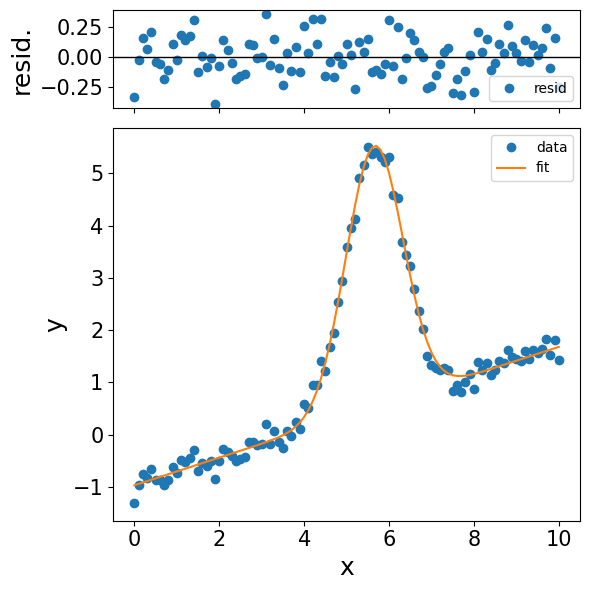

In [17]:
lg.fit()
lg.report()
# --- fancy plots ---
pretty_kw={'width': 6, 'height':6, 'dpi':100} # width and height and dpi of figure, or None to use default settings
ax1 = lg.plot_fit(plot_residual=True, numpoints=None, xlabel='x', ylabel='y', pretty_kw=pretty_kw)  # plot fit parameters
# --- OR ---
# ax1 = lg.plot(plot_residual=True, show=True, numpoints=None, xlabel='x', ylabel='y', pretty_kw=pretty_kw)


In [18]:
# you can also get_fitdata() as you wish
# see next examples on how we can handle multi-component and multi-dataset fit